<a href="https://colab.research.google.com/github/kecosz/rELA/blob/main/_rELA0_80_1_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tutorial for rELA 0.8x
### Notes:

### 0.80
##### **Update in SA argorithm**: Parameter for sparse-matrix is normalized by the number of species (matrix size), and fitting with more fixed parameters is now possible regardless of the number of species.

##### **Update in random parameter set generation** By running *hb.params* and *HeatBath* functions, species occurence matrix and environmental parameter matrix are randomly generated based on the known parameter sets (h,g, and J). Users freely can change the connectivity in species-species interactions.

#### 0.80.1
**Fix the error in *runELA* function.** Modifying *sstable* and *tptable*.

## Setup

In [ ]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

## rpy2 version specification
### Required to successfully execute "%load_ext rpy2.ipython" as of 2023/1
!pip install rpy2==3.5.1
#!pip install --upgrade ipykernel
%load_ext rpy2.ipython

###The following codes is just for not showing rpy2 messages related to R package installation on google colab
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import logging
rpy2_logger.setLevel(logging.ERROR)   # will display errors, but not warnings

## Doanload rELA package
!rm -r rELA
!git clone https://github.com/kecosz/rELA.git

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314975 sha256=1d4c4df60d5073aadfe96bc5f7b8702f6b3fef0453a9137f37e9cc99f35c2eea
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.17
    Uninstalling rpy2-3.5.17:
      Successfully uninstalled rpy2-3.5.17
rm: cannot remove 'rELA': No such file or directory
Cloning into 'rELA'...
remote: Enumerating objects: 1000, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 1000 (delta 183), reused 115 (delta 115), pack-reused 764 (from 2)
Receiving objects: 100% (1000/1000), 10.61 MiB | 30.44 MiB/s, done.
Resolving deltas: 100% (488/488), done.


In [ ]:
%%R
# [for Google Colab]
# from v0.50, Due to errors in installing igraph and tidygraph
#system("add-apt-repository -y ppa:marutter/rrutter4.0")
#system("add-apt-repository -y ppa:c2d4u.team/c2d4u4.0+")
#system("add-apt-repository ppa:cran/v8")
#system("apt-get update")
#system("apt-get install libnode-dev")
#system("apt-get install r-cran-igraph r-cran-tidygraph")

NULL


In [ ]:
%%R
## package instllation
install.packages("Rcpp")
install.packages("RcppArmadillo")
install.packages("doParallel")
install.packages('tidyverse')
install.packages('gsubfn')
install.packages('zoo')
install.packages('dplyr')
install.packages('tidyr')
install.packages('ggplot2')
install.packages('gtools')
install.packages('ggsci')
install.packages('igraph')
install.packages('tidygraph')
install.packages('RColorBrewer')
install.packages("stringdist")
install.packages("purrr")
install.packages("plot3D")
install.packages("devtools")
library("Rcpp")
library("RcppArmadillo")
library("doParallel")
library('tidyverse')
library('gsubfn')
library('zoo')
library('dplyr')
library('tidyr')
library('ggplot2')
library('gtools')
library('ggsci')
library('igraph')
library('tidygraph')
library('RColorBrewer')
library("stringdist")
library("purrr")
library("plot3D")
library("devtools")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::accumulate() masks foreach::accumulate()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ purrr::when()       masks foreach::when()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
%%R
# If already installed
detach("package:rELA",unload=TRUE)
remove.packages("rELA")

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
%%R
install_local("/content/rELA.v0.80.1.tar.gz",type="source")

# optional: install rELA package
# install.packages("/content/rELA.v0.70.tar.gz",type = "source")

library("rELA")

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmphcpcmG/remotes4225e654415/rELA/DESCRIPTION’ ... OK
* preparing ‘rELA’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* installing the package to process help pages
* saving partial Rd database
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘rELA_0.80.tar.gz’



## Energy Landscape Analysis

### Download data

In [ ]:
%%R
# Specify the path for your own data in the code below, if necessary.
#baseabtable <- read.csv('/content/drive/MyDrive/Colab Notebooks/ela_data/abundance_table.csv', sep=',', fileEncoding='utf-8') %>%
#  column_to_rownames(., var = "X")
#basemetadata <- read.csv('/content/drive/MyDrive/Colab Notebooks/ela_data/sample_metadata.csv', sep=',', fileEncoding='utf-8') %>%
#  column_to_rownames(., var = "X")

# To group species with the same presence/absence pattern into one group,
#set grouping to 1 and specify a number between 0 and 1 for grouping_th.
# If 0, only species with the same presence/absence pattern will be grouped together.

#list[ocmat, abmat, enmat, samplelabel, specieslabel, factorlabel] <-
#  Formatting(baseabtable, basemetadata=NULL, normalize=1, parameters=c(0.01, 0.01, 0.99), grouping=1, grouping_th=0.)

Processed 256 samples.
Relative abundance threshold = 0.01 
Occurrence threshold (lower) = 0.01 
Occurrence threshold (upper) = 0.99 
0  groups were found.
Selected  16  out of  16 species.


### Using randomly generated parameter sets

In [ ]:
%%R
# Alternatively, ocmatrix and enmatrix can be generated from the heatbath sampling
# based on the randomly generated parameter sets, h, g, and J.
# Here, j_connectivity is set to 0.75, meaning that species-species interactions exist (> 0)
# in 75 % of all possible pairs, and otherwise 25 % is set to 0 in J matrix.

hb_params <- hb.paramgen(16, ne = 0)
h.act <- hb_params[[1]]
j.act <- hb_params[[2]]
list[rand_mat,rand_enmat] <- HeatBath(500, 512, h.act, j.act, j_connectivity=0.75)
list[rand_mat, abmat, rand_enmat, samplelabel, specieslabel, factorlabel] <-
  Formatting(rand_mat, basemetadata=rand_enmat, normalize=1, parameters=c(0.01, 0.01, 0.99), grouping=1, grouping_th=0.)

In [ ]:
%%R
head(rand_mat)

         species.1 species.2 species.3 species.4 species.5 species.6 species.7
sample.1         1         0         1         1         0         0         0
sample.2         0         1         1         1         0         0         0
sample.3         0         0         1         1         0         0         0
sample.4         0         0         1         1         1         0         0
sample.5         1         1         1         1         0         0         0
sample.6         0         0         1         1         0         0         0
         species.8 species.9 species.10 species.11 species.12 species.13
sample.1         1         1          1          1          1          0
sample.2         1         1          1          1          1          0
sample.3         1         1          1          1          1          0
sample.4         1         1          1          1          1          1
sample.5         1         1          1          1          1          1
sample.6 

### Parameter fitting

In [ ]:
%%R
# Here, a randomly generated matrix is used in this tutorial for validation.
#list[bp,allresults] <-Findbp(ocmat,rep=16,threads=2,fastfitting = TRUE)
list[bp,allresults] <- Findbp(rand_mat,rep=32,threads=2,
                              fastfitting = TRUE,intv=100,totalit=4000,maxlr=0.005)

Try: lambda=0.000500, we=0.001000, runadamW=TRUE, Sparse=TRUE

Try: lambda=0.001000, we=0.001000, runadamW=TRUE, Sparse=TRUE

Try: lambda=0.002500, we=0.001000, runadamW=TRUE, Sparse=TRUE

Try: lambda=0.005000, we=0.001000, runadamW=TRUE, Sparse=TRUE

Try: lambda=0.007500, we=0.001000, runadamW=TRUE, Sparse=TRUE



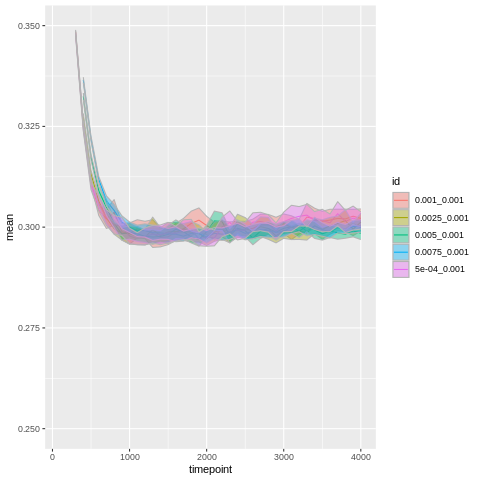

In [ ]:
%%R
plotSAtest(allresults,ylim=c(0.25,0.35))

Here, "id" corresponds to the tested parameter sets (lambda, we), which are key hyper parameters for Sparse matrix and adamW. The results explain lambda should be set to high for preventing overfitting in the optimization.

In [ ]:
%%R
# Then use the parameter set giving the best fitted result
list[lmd,we,totalit] <- as.numeric(unlist(strsplit(names(bp)[1], split = "_")))
#runSA: ocmatrix, env (environmental parameters; with>SA / without>fullSA), qth (threshold for stopping computation), rep (number of fitting processes to compute mean parameter value), threads (number of parallel threads)
sa <- runSA(rand_mat, rep = 64,threads=2,getall=FALSE,totalit=totalit,
            lambda = lmd, we = we)


Start parameter fitting:
SA: elapsed time 51.09 sec



In [ ]:
%%R
list[he,je,ge,hge] <- sa2params(sa)

In [ ]:
%%R
h.act

  species.1   species.2   species.3   species.4   species.5   species.6 
 0.35646923 -1.98566811 -1.91540662 -1.20153065  1.51842030 -1.85300636 
  species.7   species.8   species.9  species.10  species.11  species.12 
 1.16691064 -1.28836798  0.60997421  0.07596623  0.22571487  1.56742865 
 species.13  species.14  species.15  species.16 
 0.40385463 -1.28996413 -1.20821166 -1.67380081 


In [ ]:
%%R
he

 species.1  species.2  species.3  species.4  species.5  species.6  species.7 
 0.2785233 -1.3037375 -0.8497559 -0.8169018  0.6111363 -1.0331838 -0.3915794 
 species.8  species.9 species.10 species.11 species.12 species.13 species.14 
-1.0040252  0.6830709  0.2144404  0.3084818  1.1177245  0.1760704 -0.6308303 
species.15 species.16 
-0.3343343 -0.8798941 


In [ ]:
%%R
# Check the correlation of the predicted h and J to the originals.
c(cor(h.act,he),cor(c(j.act),c(je)))

[1] 0.8910064 0.8656612


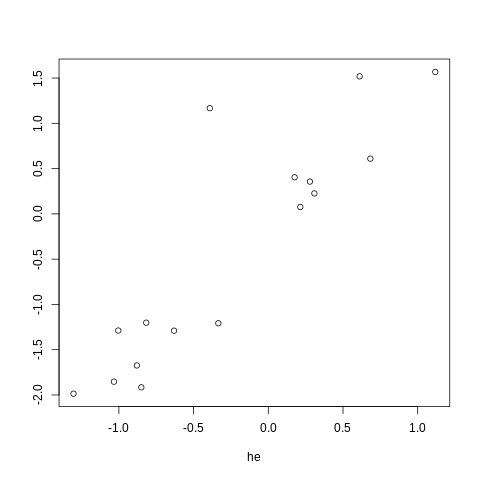

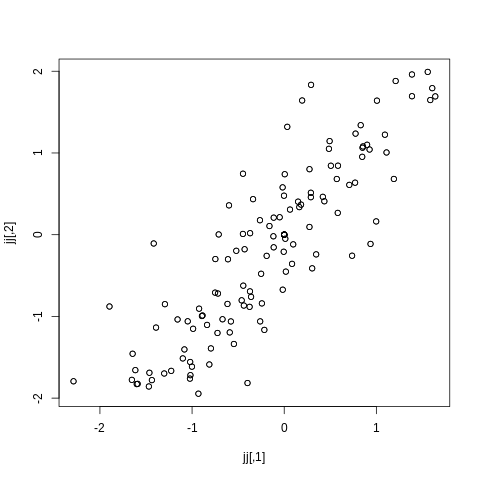

In [ ]:
%%R
hh <- t(rbind(he, t(h.act)))
plot(hh)
jj <- t(rbind(c(je), t(c(j.act))))
plot(jj)

### Analysis and visualization of energy landscape
#### ELA function

In [ ]:
%%R
ela <- ELA(sa, env=NULL,
                SS.itr=20000, FindingTip.itr=10000, # <- the number of steps for finding stable states and tipping points (basically no need to change)
                threads=2, reporting=TRUE)

Start ELA:
4 stable states were found.
Checking 6 tipping points.
converting...
ELA: elapsed time 0.88 sec


In [ ]:
%%R
elap <- ELPruning(ela, th=1)

Start pruning:
*....
ELPruning: elapsed time 0.31 sec


*ATTENTION*  
The return value of ELPruning is a list consisting of two elements, the first of which takes the same form as ELA, and the second of which indicates the correspondence between the stable states before and after pruning.

In [ ]:
%%R
list[stablestates, stablen, tippingpoints, tippingen] <- elap[[1]]

Stable states

In [ ]:
%%R
stablestates

[1] "Dp6"


Convert an integer representing a stable state (ssid) to a binary vector

In [ ]:
%%R
# ssid -> binary vector
bin = as.list(lapply(stablestates, function(x){id2bin(x, ncol(rand_mat))}))
names(bin) <- stablestates
bin

$Dp6
 [1] 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0



Convert a binary vector to a ssid

In [ ]:
%%R
# binary vector -> ssid
as.vector(sapply(bin, bin2id))

[1] "Dp6"


Table of SSID, Energy, Community composition

In [ ]:
%%R
sstable(elap[[1]],rand_mat) # or sstable(ela)

   ID            Energy species.13 species.1 species.14 species.5 species.9
1 1yF -13.9603468339601          0         0          1         1         1
  species.6 species.8 species.15 species.12 species.7 species.16 species.2
1         1         1          0          0         0          0         1
  species.10 species.11 species.4
1          1          1         1


Export the table to Google Drive in CSV format

In [ ]:
%%R
write.csv(x = sstable, file="drive/MyDrive/colab_export/sstable.csv") # "sstable.csv" is saved in "colab_export" folder of your Google Drive.

ID and energy of tipping points

Table of TPID, SSID1, SSID2, Energy, Community composition

In [ ]:
%%R
tptable(elap[[1]])

only one stable state is found.
No tipping points exist.
NULL


Energy of any community composition


In [ ]:
%%R
cEnergy(rand_mat[1,], he, je)

[1] -15.92523


Find the stable state for a community composition

In [ ]:
%%R
Bi(rand_mat[1,], he, je)

[[1]]
[1] "Dp6"

[[2]]
[1] -15.92523



### Principal component analysis  
Observed community compositions plotted on a PC1,2 plane and color-coded by their stable states

NULL


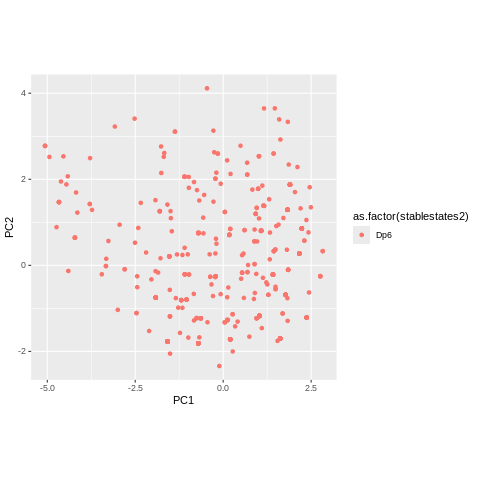

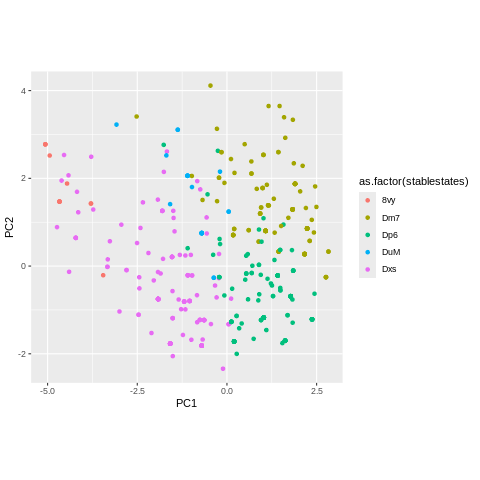

In [ ]:
%%R
PCplot(rand_mat, sa, ssrep=elap[[2]])
PCplot(rand_mat, sa, ssrep=elap[[2]], pruned=FALSE)

Disconnectivity graph


In [ ]:
%%R
showDG(elap[[1]], rand_mat, "test")

only one stable state found


### Visualization of species' interaction

NULL


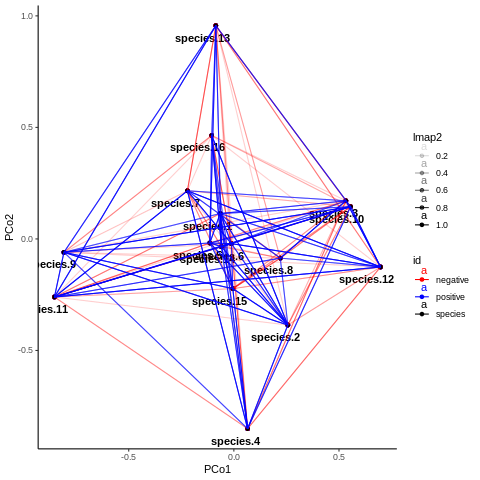

In [ ]:
%%R
showIntrGraph(elap[[1]], sa, th=0.01, # <- Threshold for links to be displayed
              annot_adj=c(0.75, 2.00))

### Energy landscape analysis with environmental gradients

In [ ]:
%%R
# Same as the case of SA, a randomly generated occurence and environmental
# matrices are used in this tutorial for validation.
hb_params <- hb.paramgen(16, ne = 2)
h.act <- hb_params[[1]]
j.act <- hb_params[[2]]
g.act <- hb_params[[3]]
list[rand_mat,rand_enmat] <- HeatBath(500, 512, h.act, j.act, g = g.act)

list[rand_mat, abmat, rand_enmat, samplelabel, specieslabel, factorlabel] <-
  Formatting(rand_mat, basemetadata=rand_enmat, normalize=1, parameters=c(0.01, 0.01, 0.99), grouping=1, grouping_th=0.)

# Formatting with metadata
#list[ocmat, abmat, enmat, samplelabel, specieslabel, factorlabel] <-
#  Formatting(baseabtable, basemetadata=basemetadata, normalize=1, parameters=c(0.01, 0.01, 0.99), grouping=1, grouping_th=0.)

Processed 512 samples.
Relative abundance threshold = 0.01 
Occurrence threshold (lower) = 0.01 
Occurrence threshold (upper) = 0.99 
0  groups were found.
Selected  15  out of  16 species.


In [ ]:
%%R
list[bp,allresults] <- Findbp(rand_mat,enmat=rand_enmat,rep=32,threads=2,ssize = 0.5,
                              fastfitting = TRUE,intv=100,
                              totalit=4000,maxlr=0.005)

Try: lambda=0.000500, we=0.001000, runadamW=TRUE, Sparse=TRUE

Try: lambda=0.001000, we=0.001000, runadamW=TRUE, Sparse=TRUE

Try: lambda=0.002500, we=0.001000, runadamW=TRUE, Sparse=TRUE

Try: lambda=0.005000, we=0.001000, runadamW=TRUE, Sparse=TRUE

Try: lambda=0.007500, we=0.001000, runadamW=TRUE, Sparse=TRUE



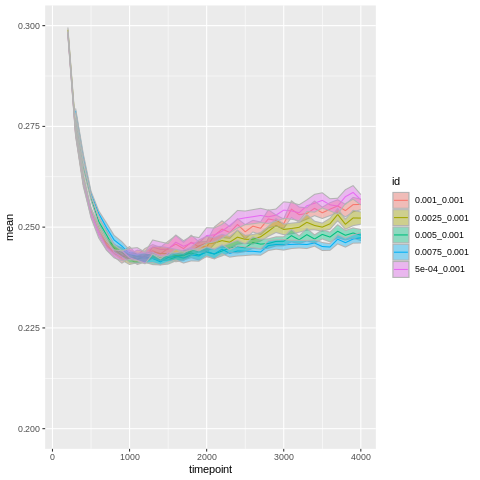

In [ ]:
%%R
plotSAtest(allresults,ylim=c(0.2,0.3))

In [ ]:
%%R
# Then use the parameter set giving the best fitted result
list[lmd,we,totalit] <- as.numeric(unlist(strsplit(names(bp)[1], split = "_")))
#runSA: ocmatrix, env (environmental parameters; with>SA / without>fullSA), qth (threshold for stopping computation), rep (number of fitting processes to compute mean parameter value), threads (number of parallel threads)
sa <- runSA(rand_mat,enmat=rand_enmat, rep = 32,threads=2, getall=FALSE, totalit=totalit,
            lambda = lmd, we = we)


Start parameter fitting
SA: elapsed time 24.37 sec



In [ ]:
%%R
list[he,je,ge,envecs] <- sa2params(sa)

In [ ]:
%%R
c(cor(h.act,he),cor(c(j.act),c(je)),cor(c(g.act),c(ge)))

[1] 0.6558423 0.7010940 0.7825559


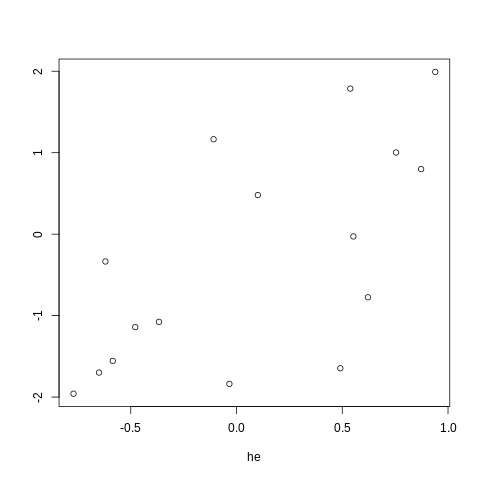

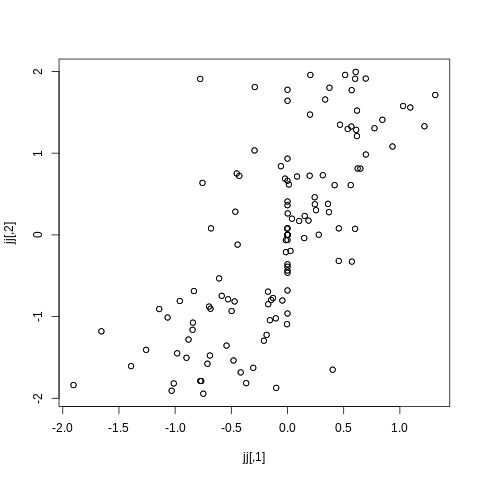

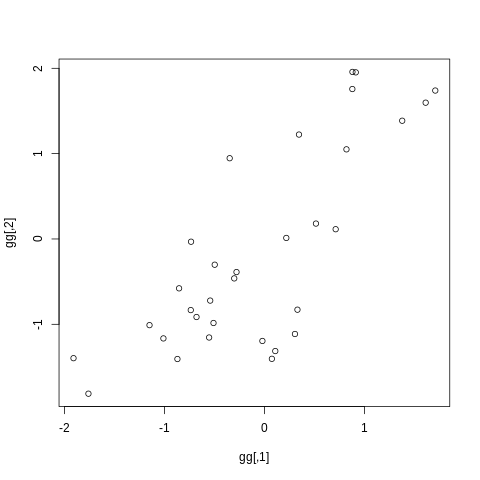

In [ ]:
%%R
hh <- t(rbind(he, t(h.act)))
plot(hh)
jj <- t(rbind(c(je), t(c(j.act))))
plot(jj)
gg <- t(rbind(c(ge), t(c(g.act))))
plot(gg)

In [ ]:
%%R
gela <- GradELA(sa=sa, eid="factor.1", # Specify the label or position of an environmental factor
  enmat=rand_enmat, env=NULL, range=NULL, steps=32, th=0.05, threads=2) #[[1]]: return value of ELA function for each step, [[2]]: value of environmental factor for each step, [[3]]: specified environmental factor

env not specified, the mean of enmat is used
processing(32) |================================|
Elapsed time 23.49 sec


NULL


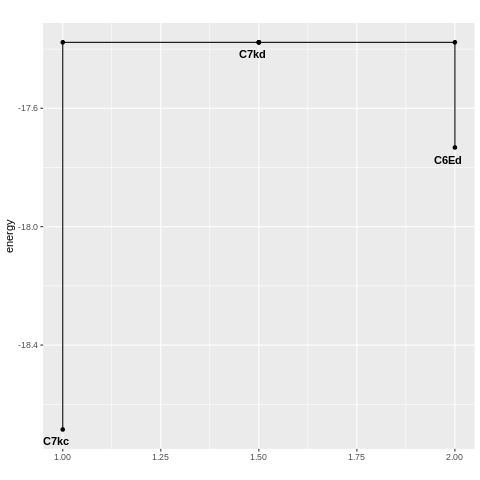

In [ ]:
# Disconnectivity graph
%%R
showDG(gela[[1]][[1]][[1]], rand_mat)

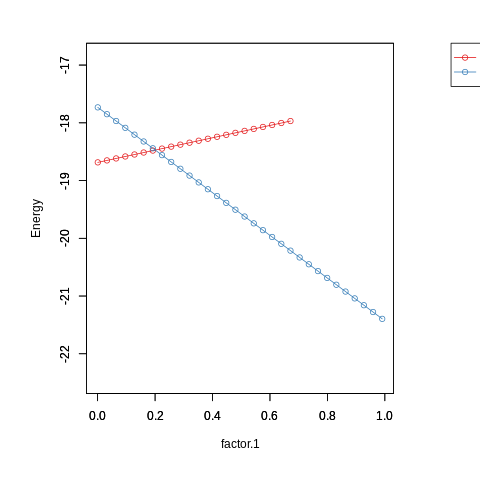

In [ ]:
# Stable state diagram
%%R
showSSD(gela)

In [ ]:
%%R
gstates <- foreach(x=gela[[1]], .combine='c') %do% {
    x[[1]][[1]]}
unique(gstates)

[1] "7kc" "6Ed"


#### GradELA 3D plot

In [ ]:
%%R
gelsobj <- GELSObj(gela, sa, threads=2)

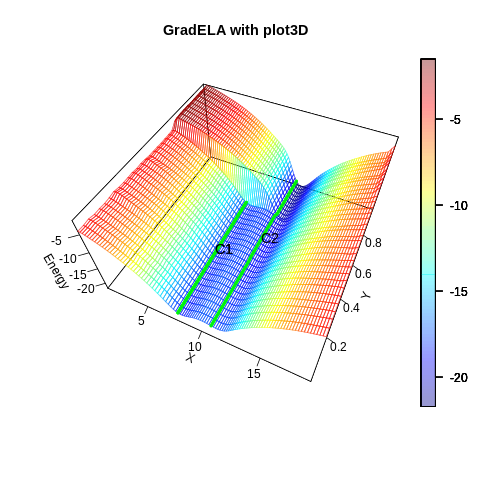

In [ ]:
%%R
showGELA3D(gelsobj)

## Stability

In [ ]:
%%R
stb <- Stability(sa, rand_mat, enmat=rand_enmat, threads=2)
head(stb, 5)

Start Stability:
Stability: elapsed time 39.10 sec

           energy.gap ss.entropy  e.realize  e.stable state.id stable.state.id
sample.1     3.463392  2.3238797 -12.714671 -16.17806      03/             2Xx
sample.10    2.076256  0.9938859 -11.697913 -13.77417      0y7             1yF
sample.100   2.220536  2.1054205 -11.765099 -13.98564      1SV             3yB
sample.101   1.558937  2.2387457 -12.276800 -13.83574      0iV             1iV
sample.102   4.839624  2.6121493  -9.895761 -14.73539      2KR             3ax


gStability returns a list of 4 elements: the first two are the dataframe for pruned/non-pruned energy landscape, respectively. In addition to the dataframe of Stability it includes e.tipping (energy of tipping point) and energy.barrier (height of energy from observed state to the tipping point).The third output is a list of parameters (h, g, j, h+g*env) and a summary table of stable states, and the fourth output is a list encapsulating the inputs required for the various plots.  
  
output of gStability:  
[[1]]: data.frame(energy.gap, ss.entropy, energy.barrier, e.realize, e.stable, e.tipping, state.id, stable.state.id)  
[[2]]: data.frame(energy.gap.np, ss.entropy.np, energy.barrier.np, e.realize, e.stable.np, e.tipping.np, state.id.np, stable.state.id.np)  
[[3]]: w/ enmat: list(list(list(he, je, ge, hge), data.frame(sstable)), ...); w/o enmat: list(list(he, je, ge, hge), data.frame(sstable))  
[[4]]: w/ enmat: list(list(ocmat, env, sa, ela, elanp), ...); w/o enmat: list(ocmat, env, sa, ela, elanp)

In [ ]:
%%R
gstb <- gStability(sa, rand_mat, enmat=rand_enmat, threads=2)

Start gStability:
gStability: elapsed time 581.99 sec



In [ ]:
%%R
gstb[[1]][1:8,]

         energy.gap ss.entropy energy.barrier e.realize  e.stable e.tipping
sample.1   0.000000  0.3584153      0.3298516 -18.19253 -18.19253 -17.86268
sample.2   3.739277  0.9393127      1.3977771 -16.26305 -20.00233 -18.60455
sample.3   3.285881  0.0000000            Inf -17.98440 -21.27028       Inf
sample.4   2.600916  0.9295232      1.2387267 -16.77776 -19.37867 -18.13995
sample.5   0.000000  0.0000000            Inf -21.43735 -21.43735       Inf
sample.6   0.000000  0.9139014      0.4071673 -17.78708 -17.78708 -17.37991
sample.7   6.045088  0.3431229      2.1457025 -15.16996 -21.21504 -19.06934
sample.8   1.868459  0.8999784      1.2826110 -17.27352 -19.14197 -17.85936
         state.id stable.state.id
sample.1      7kc             7kc
sample.2      7cc             7kc
sample.3      6Eb             6Ed
sample.4      6ks             7kc
sample.5      6Ed             6Ed
sample.6      7kc             7kc
sample.7      5Es             6Ed
sample.8      6k7             6Ed


In [ ]:
%%R
gstb[[2]][1:8,]

         energy.gap.np ss.entropy.np energy.barrier.np e.realize e.stable.np
sample.1      0.000000     0.6048126         0.3298516 -18.19253   -18.19253
sample.2      3.739277     0.9601333         1.3977771 -16.26305   -20.00233
sample.3      3.285881     0.0000000               Inf -17.98440   -21.27028
sample.4      2.600916     0.8540847         1.2387267 -16.77776   -19.37867
sample.5      0.000000     0.0000000               Inf -21.43735   -21.43735
sample.6      0.000000     0.8595064         0.4071673 -17.78708   -17.78708
sample.7      6.045088     0.7452883         2.1457025 -15.16996   -21.21504
sample.8      1.868459     0.8725651         1.2826110 -17.27352   -19.14197
         e.tipping.np state.id.np stable.state.id.np
sample.1    -17.86268         7kc                7kc
sample.2    -18.60455         7cc                7kc
sample.3          Inf         6Eb                6Ed
sample.4    -18.13995         6ks                7kc
sample.5          Inf         6Ed         

===================================================================================

In [ ]:
%%R
apply(ocmat,2,mean)

  species.1   species.2   species.3   species.4   species.5   species.6 
0.001953125 0.998046875 0.902343750 0.472656250 0.361328125 0.000000000 
  species.7   species.8   species.9  species.10  species.11  species.12 
0.968750000 0.771484375 0.986328125 0.099609375 0.720703125 0.160156250 
 species.13  species.14  species.15  species.16 
0.041015625 1.000000000 0.966796875 0.705078125 


NULL


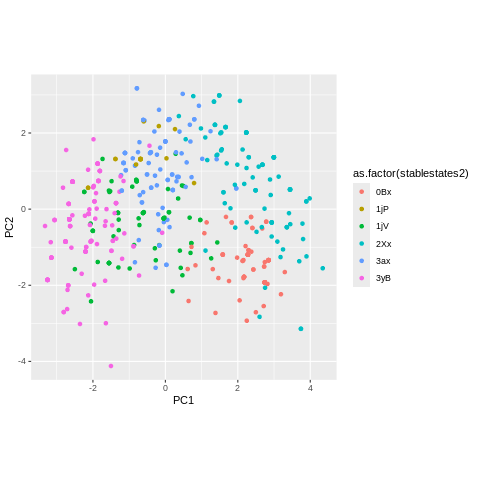

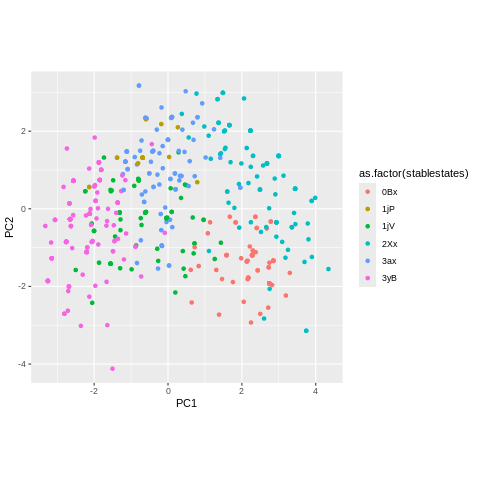

In [ ]:
## PCplot
%%R
sample.id <- 1
ocmat <- gstb[[4]][[sample.id]][[1]]
env <- gstb[[4]][[sample.id]][[2]]
sa <- gstb[[4]][[sample.id]][[3]]
ela <- gstb[[4]][[sample.id]][[4]]
# if enmat=NULL, remove "[[sample.id]]"

PCplot(ocmat, sa, env, ssrep=ela[[2]])
PCplot(ocmat, sa, env, ssrep=ela[[2]], pruned=FALSE)

NULL


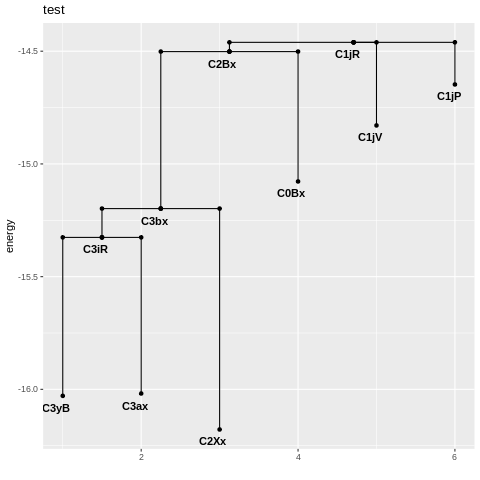

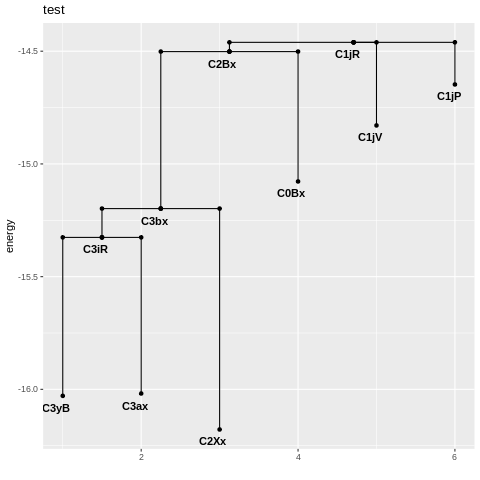

In [ ]:
%%R
sample.id <- 1
ocmat <- gstb[[4]][[sample.id]][[1]]
ela <- gstb[[4]][[sample.id]][[4]]
elanp <- gstb[[4]][[sample.id]][[5]]
# if enmat=NULL, remove "[[sample.id]]"

showDG(ela[[1]], ocmat, "test")
showDG(elanp, ocmat, "test")